<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Баланас-классов-методом-'class_weight'" data-toc-modified-id="Баланас-классов-методом-'class_weight'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Баланас классов методом 'class_weight'</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score, roc_curve

### Загрузка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Предобработка данных

Признаки "RowNumber", "CustomerId" и "Surname" можно удалить, так как в них нет нужных данных для дальнейшего анализа.

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

Преобразуем категориальные признаки в численные.

In [7]:
df_ohe = pd.get_dummies(df, drop_first=True)

Пропуски в столбце "Tenure" могут быть связаны с проблемой выгрузки данных или у клиента может не быть недвижимости.  Попробуем заменить пропуски на 0.

In [8]:
df['Tenure'].fillna(0, inplace=True)

Посмотрим на распределение числовых признаков

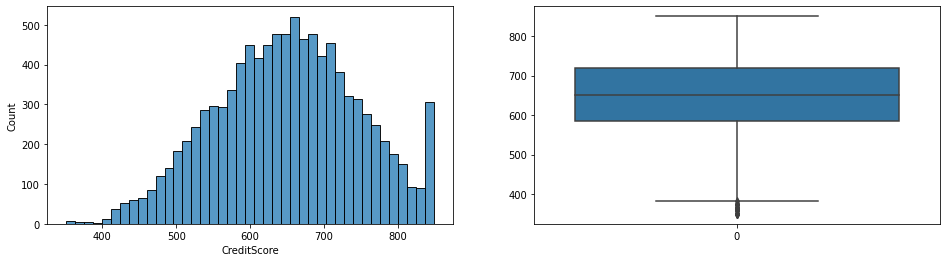

In [9]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df['CreditScore'], ax=axes[0])
sns.boxplot(data=df['CreditScore'], ax=axes[1])
plt.show()

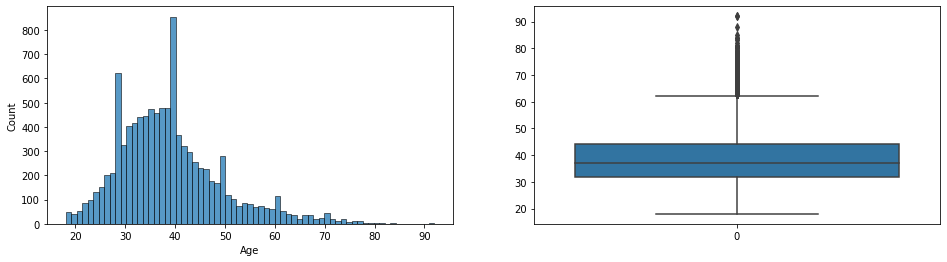

In [10]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df['Age'], ax=axes[0])
sns.boxplot(data=df['Age'], ax=axes[1])
plt.show()

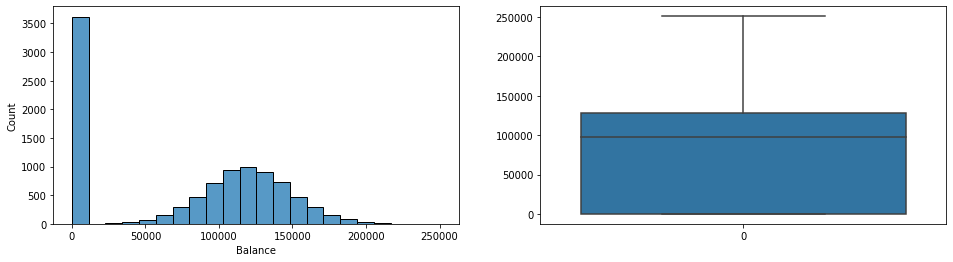

In [11]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df['Balance'], ax=axes[0])
sns.boxplot(data=df['Balance'], ax=axes[1])
plt.show()

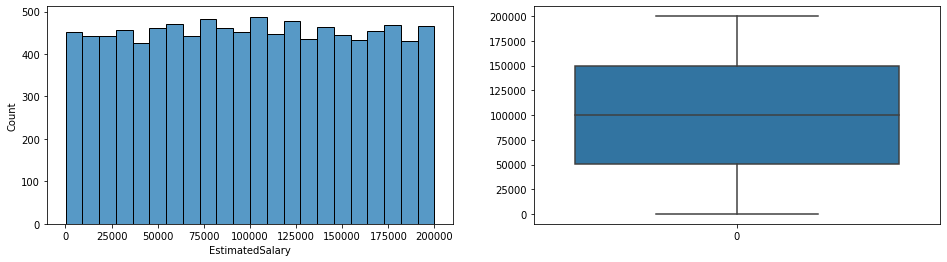

In [12]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df['EstimatedSalary'], ax=axes[0])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1])
plt.show()

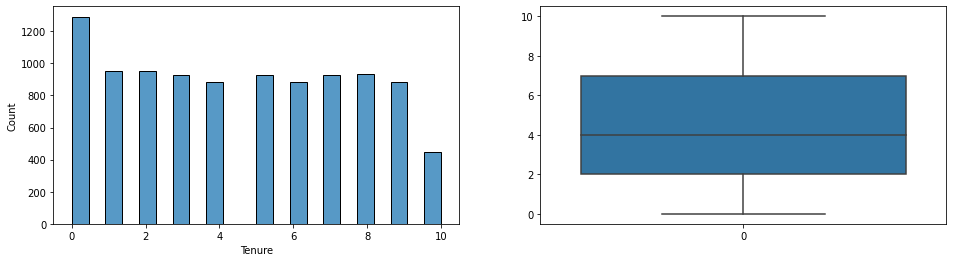

In [13]:
f, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df['Tenure'], ax=axes[0])
sns.boxplot(data=df['Tenure'], ax=axes[1])
plt.show()

Преобразуем катергориальные признаки в численные.

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Посмотрим на соотношение данных в целевом признаке.

<AxesSubplot:>

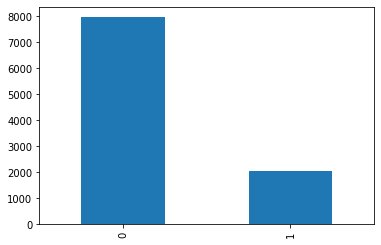

In [17]:
df['Exited'].value_counts().plot(kind='bar')

Видно что соотношение классов 1:4. 

### Выводы

- Данные успешно загружены.
- Признаки RowNumber, CustomerId и Surname удалены, так как они не влияют на целевой признак.
- Категориальные признаки преобразованы методом One-Hot Encoder.
- В признаке Tenure обнаружено около 10% пропусков. Принято решение заменить их на 0.
- Соотношение классов в целевом признаке 1:4.

## Исследование задачи

Вначале выделим целевой признак из общих данных.

In [18]:
features = df.drop('Exited', axis=1)
target = df['Exited']

Разделим данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

In [19]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345,
)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345
)

In [20]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
scaler = StandardScaler()
scaler.fit(features_train[numerics])
features_train[numerics] = scaler.transform(features_train[numerics],)
features_valid[numerics] = scaler.transform(features_valid[numerics])
features_test[numerics] = scaler.transform(features_test[numerics])

/tmp/ipykernel_159/674920129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numerics] = scaler.transform(features_train[numerics],)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [21]:
print('features_train', features_train.shape,
      '\nfeatures_valid', features_valid.shape,
      '\nfeatures_test', features_test.shape)

features_train (6000, 11) 
features_valid (2000, 11) 
features_test (2000, 11)


### Случайный лес

In [22]:
best_depth = 0
best_n = 0
best_f1 = 0
for depth in range(1, 12):
    for n in range(30,150, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=n)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_n = n
print("F1 наилучшей модели случаного леса:",best_f1)
print("Наилучшее параметры:")
print("max_depth:",  depth)
print('n_estimators:', best_n)

F1 наилучшей модели случаного леса: 0.5806451612903226
Наилучшее параметры:
max_depth: 11
n_estimators: 60


### Логистическая регрессия

In [23]:
model = LogisticRegression(random_state=12345, solver = 'liblinear')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
print("F1 логистической регресии:",f1)

F1 логистической регресии: 0.33389544688026984


### Выводы

- Данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.
- Числовые признаки были отмасштабированы.
- Обучены модели "Случайный лес" и "Логистическая регрессия", без баланса классов. Лучшее значение F1 меры получено у случайного леса (0.58), оно не удовлетворяет условию тех.задания.

## Борьба с дисбалансом

### Баланас классов методом 'class_weight'

In [24]:
model = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
print("F1 логистической регресии после баланса класов 'class_weight':",f1)

F1 логистической регресии после баланса класов 'class_weight': 0.4888888888888888


In [25]:
best_depth = 0
best_n = 0
best_f1 = 0
for depth in range(1, 12):
    for n in range(30,150, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=n, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_n = n
print("F1 логистической регресии после баланса класов 'class_weight':",f1)
print("Наилучшее параметры:")
print("max_depth:",  depth)
print('n_estimators:', best_n)

F1 логистической регресии после баланса класов 'class_weight': 0.6157760814249365
Наилучшее параметры:
max_depth: 11
n_estimators: 130


### Увеличение выборки

In [26]:
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * 4)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * 4)
    
    ([target_zeros] + [target_ones] * 4)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [27]:
features_upsampled_train, target_upsampled_train = upsample(features_train, target_train)  

In [28]:
model = LogisticRegression(random_state=12345, solver = 'liblinear')
model.fit(features_upsampled_train, target_upsampled_train)
predictions = model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
print("F1 логистической регресии после баланса класов увеличением выборки:",f1)

F1 логистической регресии после баланса класов увеличением выборки: 0.4888888888888888


In [29]:
best_depth = 0
best_n = 0
best_f1 = 0
for depth in range(1, 12):
    for n in range(30,150, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=n)
        model.fit(features_upsampled_train, target_upsampled_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_n = n
print("F1 случайного леса после баланса класов увеличением выборки:",f1)
print("Наилучшее параметры:")
print("max_depth:",  depth)
print('n_estimators:', best_n)

F1 случайного леса после баланса класов увеличением выборки: 0.6208476517754868
Наилучшее параметры:
max_depth: 11
n_estimators: 130


### Выводы

- Проверены два метода баланса классов.
- Лучший результат показал баланс классов методом увеличения выборки у модели случайного леса (F1 = 0.62). Полученный результат удовлетворяет условию тех.задания.

## Тестирование модели

In [30]:
model = RandomForestClassifier(max_depth=11, n_estimators=130, 
                               random_state=12345                               
                              )

model.fit(features_upsampled_train, target_upsampled_train)
predictions = model.predict(features_test)
f1 = f1_score(target_test, predictions)

probabilities_valid_final = model.predict_proba(features_valid)
probabilities_one_valid_final = probabilities_valid_final[:, 1]
rc = roc_auc_score(target_test, probabilities_one_valid_final)

print("F1 случайного леса для тестовой выборки':",f1.round(3))

print("AUC-ROC случайного леса для тестовой выборки':",rc.round(3))

F1 случайного леса для тестовой выборки': 0.599
AUC-ROC случайного леса для тестовой выборки': 0.515


Text(0.5, 1.0, 'ROC-кривая')

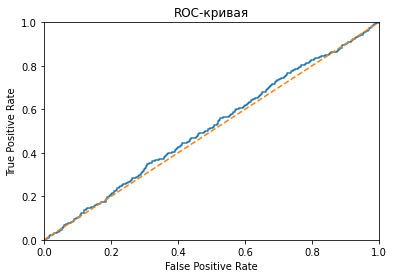

In [31]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_final) 

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

## Вывод

- Загрузили и подготовили данные к исследованию:
    - Избавились от пропусков
    - Удалили ненужные столбцы
    - Отмасштабировали количественные признаки 
    - Преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding
    - Разделили данные на три выборки: обучающую, валидационную и тестовую
- Исследовали баланс классов - соотношение классов в целевом признаке 1:4
- Изучили модели без учёта дисбаланса. Лучший результат показала модель случайного леса.
- Применили 2 способа борбы с дисбалансом - аргумент "class_weight" и  увеличение выборки. Лучший результаты показал аргумент "class_weight".
- Обучили финальную модель и проверили ее на тестовой выборке. Получены значения:
    - F1 = 0.599
    - AUC-ROC = 0.515 